In [2]:
# Linear Regression

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<AxesSubplot:xlabel='TV', ylabel='Density'>

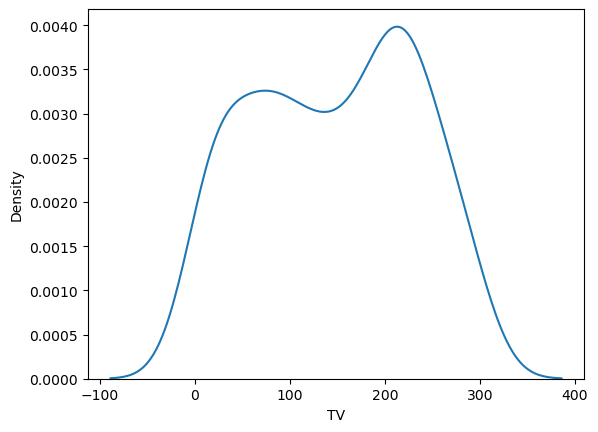

In [14]:
sns.kdeplot(df['TV'])

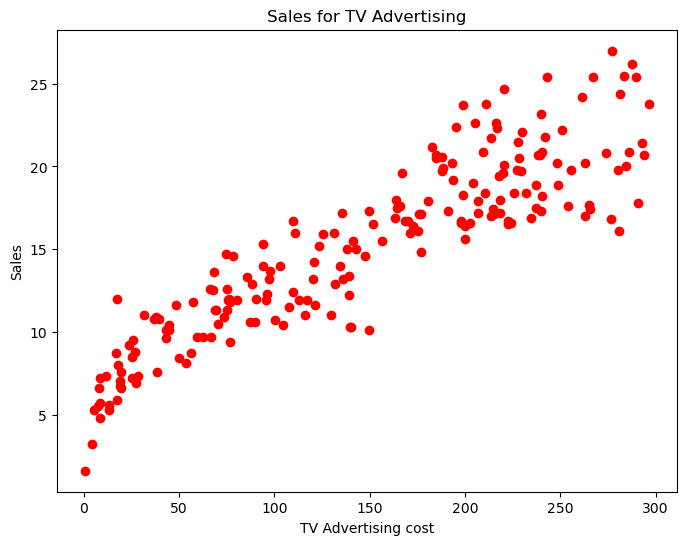

In [15]:
plt.figure(figsize = (8,6))
plt.scatter(x = df['TV'], y = df['Sales'], color = 'red')
plt.xlabel('TV Advertising cost')
plt.ylabel('Sales')
plt.title('Sales for TV Advertising')
plt.show()

In [16]:
# Now using linear regression

In [17]:
X= df[['TV']]     # tala lr.fit le error falxa 1D vayera so we make it 2D
y = df['Sales']

In [18]:
## it automatically splits the data for training data and testing data
from sklearn.model_selection import train_test_split

In [23]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)  
## training garda x_train and y-train duitai dinxam and testing garda x_test dinxam ani y_test nikalxam 
##and then difference kati aayexa tyo herxam

In [24]:
X_train.shape   # 200  thyo, tesma 160 ota training ma gayo, remaining testing ma gayo

(150, 1)

In [25]:
y_train.shape

(150,)

In [26]:
X_test.shape

(50, 1)

In [27]:
y_test.shape

(50,)

In [32]:
## LinearRegression is a class so we make an object
from sklearn.linear_model import LinearRegression   

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train , y_train)

LinearRegression()

In [35]:
lr.coef_   # coefficient ayo    B1 ko value i.e slope

array([0.05538653])

In [36]:
lr.intercept_   # B0 ko value

7.098853680118275

In [37]:
y_pred  =  lr.predict(X_test) 
print(y_pred)

[16.14347417 17.92138181 23.32156857  7.74687609 19.30050643 11.25838215
 19.10665357  9.86818022 19.41681814 16.79703523  8.8435294  10.21157671
 20.08699517  7.39794095 14.82527473 16.52564123  7.50317536 18.04323218
 11.26945945 20.24761611 19.81006251 10.85406047  9.20354185 20.99533427
 10.92052431 10.06203308 18.92387802 14.81419743 11.92855917  7.56410054
 18.16508254 10.93160162 18.11523467  8.03488605 22.64585289 20.29192533
  9.77402312 22.25814718 13.5901551   8.62198328 13.52369126 16.90226964
  9.48601316 10.54943455 19.50543659  9.21461916 11.00914276 15.25728968
 12.89228481 11.32484598]


In [38]:
test_vs_pred_df = pd.DataFrame({'Actual' : list(y_test), 'Prediction' : y_pred})
test_vs_pred_df.head()

,Actual,Prediction
0,16.9,16.143474
1,22.4,17.921382
2,21.4,23.321569
3,7.3,7.746876
4,24.7,19.300506


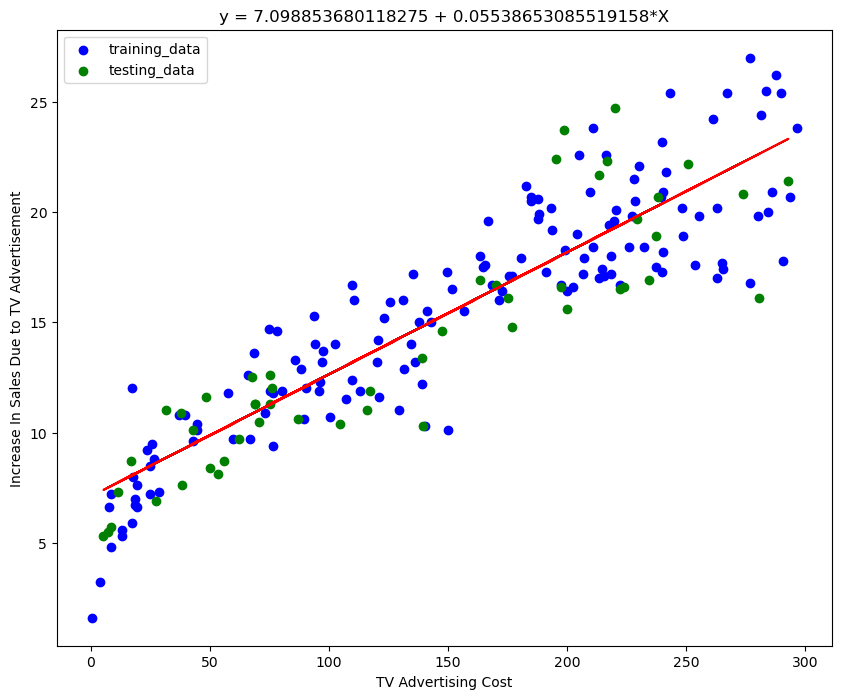

In [39]:
plt.figure(figsize = (10, 8))
plt.scatter(x = X_train, y = y_train, color = 'blue', label = 'training_data')
plt.scatter(x = X_test, y = y_test, color = 'green', label = 'testing_data')
plt.plot(X_test, y_pred, color = 'red')
plt.title("y = {} + {}*X".format(lr.intercept_, lr.coef_[0]))
plt.xlabel('TV Advertising Cost')
plt.ylabel("Increase In Sales Due to TV Advertisement")
plt.legend()
plt.show()

# Cost/Loss Function For Linear Regression

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [43]:
def mse(y_act, y_pred):   ## MSE = Mean Squared error     ## y_act = actual
    return np.mean((y_pred - y_act)**2)

In [45]:
mse(y_act = y_test, y_pred = y_pred)

5.513351187165512

In [50]:
mean_squared_error(y_pred, y_test)

5.513351187165511

In [51]:
def mae(y_act, y_pred):
    return np.mean(abs(y_pred - y_act))

In [52]:
mae(y_act = y_test, y_pred = y_pred)

1.865114691109916

In [56]:
mean_absolute_error(y_pred, y_test)

1.8651146911099161

In [54]:
def rmse(y_act, y_pred):
    return np.sqrt(np.mean((y_pred - y_act) **2))

In [55]:
rmse(y_act = y_test, y_pred = y_pred)

2.3480526372220685

In [57]:
np.sqrt(6.101072906773963)

2.470035001123256

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
r2_score(y_test, y_pred)

0.7971876919875108

In [60]:
def adjr2(actual: np.ndarray, predicted: np.ndarray,
          rowcount: np.int, featurecount: np.int):
    """ R2 Score """
    return 1-(1-r2_score(actual,predicted))* (rowcount-1)/(rowcount-featurecount - 1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16948\915706047.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rowcount: np.int, featurecount: np.int):


In [61]:
def adjr2(actual, predicted,n, d):
    """ R2 Score """
    return 1-(1-r2_score(actual,predicted))* (n-1)/(n-d-1)

In [62]:
y_test.shape[0]

50

In [63]:
adjr2(y_test, y_pred,y_test.shape[0],1)

0.792962435570584

# Multiple Linear Regression

In [32]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [64]:
data = df[['TV', 'Radio']]
labels = df['Sales']

In [65]:
data.shape

(200, 2)

In [66]:
labels.shape

(200,)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train , x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, random_state = 42)  

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 2)
(50, 2)
(150,)
(50,)


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [74]:
lr = LinearRegression()

In [75]:
lr.fit(x_train, y_train)

LinearRegression()

In [76]:
lr.intercept_

4.8193142960357385

In [77]:
lr.coef_ 

array([0.05461317, 0.10204696])

In [78]:
y_pred  =  lr.predict(x_test) 
print(y_pred)

[16.96232854 20.35836726 23.70344018  9.2238211  21.85089619 12.49240675
 21.13931062  8.73371742 17.31224257 16.67813661  9.04998426  8.47024201
 17.97306191  8.16542944 12.65214988 14.9104418   8.08550994 17.98857046
 11.00323911 20.59077178 20.64915314 12.25700576 11.00710709 22.24647217
  9.53665961  7.94521271 20.8672449  13.90660952 10.78573667  8.05374216
 15.9963474  10.69050817 20.72299317 10.20172889 21.56768334 21.32838162
 12.25333734 22.71609552 12.72006789  6.48445156 11.94020339 15.43488178
  9.89779562  9.50750635 17.29757668  7.28311107 10.3077553  15.30275627
 11.11351935 11.79259037]


In [79]:
mean_squared_error(y_pred, y_test)

2.356396290987084

In [80]:
np.sqrt(mean_squared_error(y_pred, y_test))

1.535055794095799

In [81]:
mean_absolute_error(y_pred, y_test)

1.1144571493849897

In [82]:
r2_score(y_test, y_pred)

0.9133183876478477

In [83]:
def adjr2(actual, predicted,n, d):
    """ R2 Score """
    return 1-(1-r2_score(actual,predicted))* (n-1)/(n-d-1)

In [84]:
adjr2(y_test, y_pred, y_test.shape[0], 2)   ## 2 ta independent variable i.e TV and Radio so we giving 2 

0.9096298083988199

In [85]:
x_train

,TV,Radio
114,78.2,46.8
173,168.4,7.1
5,8.7,48.9
126,7.8,38.9
117,76.4,0.8
...,...,...
106,25.0,11.0
14,204.1,32.9
92,217.7,33.5
179,165.6,10.0


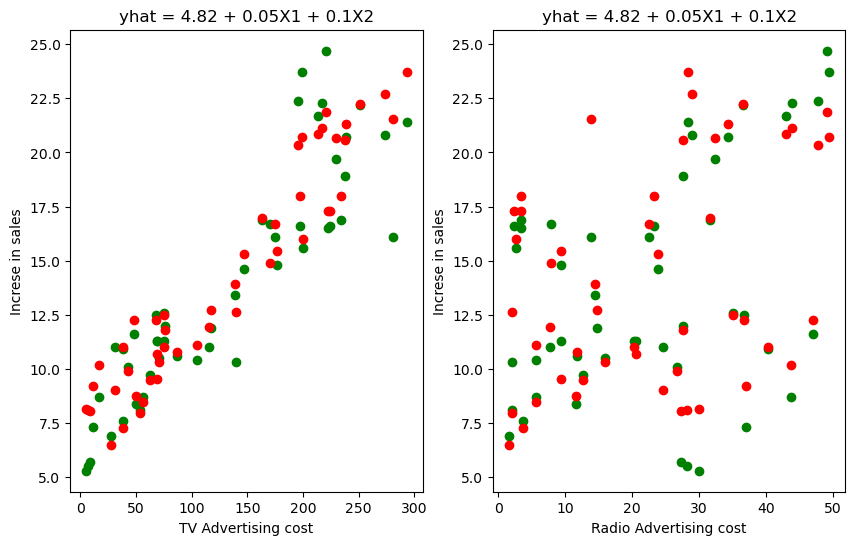

In [86]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.scatter(x_test['TV'], y_test, color = 'green')
plt.scatter(x_test['TV'], y_pred, color= 'red' )
plt.title("yhat = {} + {}X1 + {}X2".format(round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                          round(lr.coef_[1], 2)))
plt.xlabel('TV Advertising cost')
plt.ylabel('Increse in sales')



#plot 2
plt.subplot(1,2,2)
plt.scatter(x_test['Radio'], y_test, color = 'green')
plt.scatter(x_test['Radio'], y_pred, color= 'red' )
plt.title("yhat = {} + {}X1 + {}X2".format(round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                          round(lr.coef_[1], 2)))
plt.xlabel('Radio Advertising cost')
plt.ylabel('Increse in sales')
plt.show()


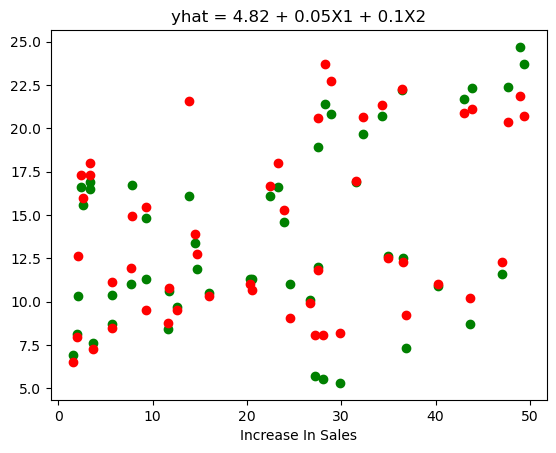

In [87]:
plt.scatter(x_test['Radio'], y_test, color = 'green')
plt.scatter(x_test['Radio'], y_pred, color = 'red')
plt.title("yhat = {} + {}X1 + {}X2".format(round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1], 2)))
plt.xlabel("Radio Advertising Cost")
plt.xlabel("Increase In Sales")
plt.show()

In [49]:
## for 3 types of linear Regression

In [50]:
data = df[['TV', 'Radio', 'Newspaper']]   ## also can be done as data = df.drop('Sales' , axis = 1)
labels = df['Sales']

In [51]:
data.shape

(200, 3)

In [52]:
labels.shape

(200,)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train , x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, random_state = 42)  

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [57]:
lr.fit(x_train, y_train)

LinearRegression()

In [58]:
lr.intercept_

4.741842244124564

In [59]:
lr.coef_ 

array([0.05461383, 0.09975946, 0.00430495])

In [60]:
y_pred  =  lr.predict(x_test) 
print(y_pred)

[17.04041233 20.39964377 23.74740099  9.25653209 21.67525948 12.56179334
 21.07865662  8.70895483 17.28353601 16.68491851  8.92573172  8.50762572
 18.2530284   8.06003145 12.68447869 14.96677492  8.12198913 17.91906169
 11.01929198 20.4979062  20.81737524 12.58662099 10.88870324 22.39692163
  9.44183427  7.95532725 20.83706013 13.83997207 10.79282849  7.92309626
 16.00432589 10.64496918 20.79094843 10.40916722 21.61788525 21.1954234
 12.10497731 22.82970275 12.63229447  6.49245031 11.94463925 15.3638056
  9.91037996  9.48003396 17.28192106  7.25660905 10.36937236 15.25293577
 11.17116856 11.72114226]


In [61]:
np.sqrt(mean_squared_error(y_pred, y_test))

1.550505544882664

In [62]:
mean_squared_error(y_pred , y_test)

2.4040674447118864

In [63]:
mean_absolute_error(y_pred , y_test)

1.119994071336177

In [64]:
r2_score(y_pred, y_test)

0.90514835876105

In [96]:
def adjr2(actual, predicted,n, d):
    """ R2 Score """
    return 1-(1-r2_score(actual,predicted))* (n-1)/(n-d-1)

In [97]:
adjr2(y_test, y_pred, y_test.shape[0], 3)

0.9057972575557502

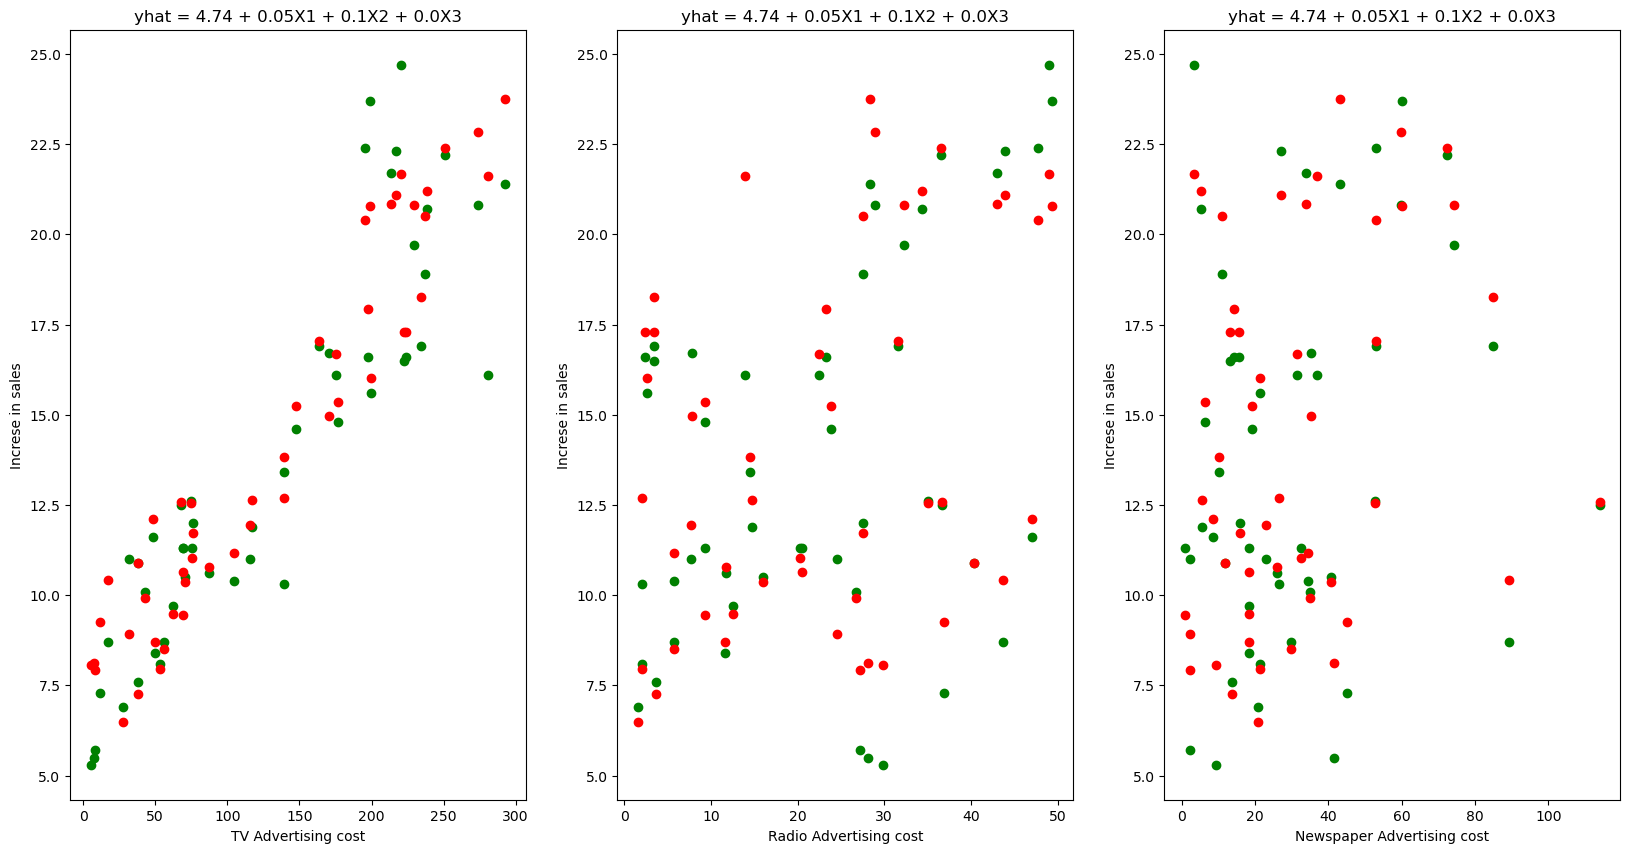

In [98]:
plt.figure(figsize = (20,10))
plt.subplot(1,3,1)
plt.scatter(x_test['TV'], y_test, color = 'green')
plt.scatter(x_test['TV'], y_pred, color= 'red' )
plt.title("yhat = {} + {}X1 + {}X2 + {}X3".format(round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1], 2),
                                           round(lr.coef_[2],2)))
plt.xlabel('TV Advertising cost')
plt.ylabel('Increse in sales')



#plot 2
plt.subplot(1,3,2)
plt.scatter(x_test['Radio'], y_test, color = 'green')
plt.scatter(x_test['Radio'], y_pred, color= 'red' )
plt.title("yhat = {} + {}X1 + {}X2 + {}X3".format(round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1], 2),
                                           round(lr.coef_[2],2)))
plt.xlabel('Radio Advertising cost')
plt.ylabel('Increse in sales')



#plot 3
plt.subplot(1,3,3)
plt.scatter(x_test['Newspaper'], y_test, color = 'green')
plt.scatter(x_test['Newspaper'], y_pred, color= 'red' )
plt.title("yhat = {} + {}X1 + {}X2 + {}X3".format(round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                          round(lr.coef_[1], 2),
                                          round(lr.coef_[2],2)))
plt.xlabel('Newspaper Advertising cost')
plt.ylabel('Increse in sales')
plt.show()

# Adjusted R^2

In [99]:
df['random'] = np.random.randint(1, 200, 200)

In [100]:
data = df.drop('Sales', axis = 1)
labels = df['Sales']

In [101]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, random_state = 42)

In [102]:
lr = LinearRegression()

In [103]:
lr.fit(x_train, y_train)

LinearRegression()

In [104]:
lr.intercept_

4.361373616374317

In [105]:
lr.coef_

array([0.05478838, 0.10066608, 0.00436831, 0.00338111])

In [106]:
y_pred = lr.predict(x_test)
y_pred

array([17.21747112, 20.17764479, 24.04828933,  8.92456692, 21.77346077,
       12.4628003 , 21.37939133,  8.5247138 , 17.15880941, 16.88824202,
        9.05670203,  8.39083701, 18.11805087,  8.14437175, 12.38266546,
       14.8315639 ,  8.29158423, 17.63906229, 10.85162905, 20.67476516,
       21.01473551, 12.71146001, 11.16413869, 22.61184801,  9.48763107,
        7.69894261, 20.66008481, 13.95067882, 10.85241473,  7.89009218,
       15.7638658 , 10.86773169, 21.06181209, 10.39813694, 21.90657707,
       21.04349621, 11.83356787, 22.96315478, 12.84721634,  6.64699666,
       12.25217885, 15.02983145, 10.06426887,  9.19740693, 17.46440632,
        7.4449198 , 10.11636984, 15.01910867, 11.09017468, 11.9986802 ])

In [107]:
r2_score(y_test,y_pred)

0.9091930161673283

In [108]:
adjr2(y_test, y_pred, y_test.shape[0], 4)

0.9011212842710908


# Performance Metrics In Linear Regression
To evaluate the performance or quality of the model, different metrics are used, and these metrics are known as performance metrics or evaluation metrics.<br>
Some of the performance metrics used in linear regression are:<br>

    1. Mean Absolute Error
    2. Mean Squared Error
    3. Root Mean Squared Error
    4. R²
    5. Adjuster R²
    
    
   We already this this in above code



# Assumptions For Linear Regression<br>

    1. Linearity: The relationship between the dependent variable and the independent variable(s) is linear.
    2. Normality:The errors follow a normal distribution.
    3. No Multicollinearity:The independent variables are not highly correlated with each other.
    4. Independence:The observations are independent of each other.
    5. Homoesedasticity: The variance of the errors is constant across all levels of the independent variable(s).



## 1. Linearity

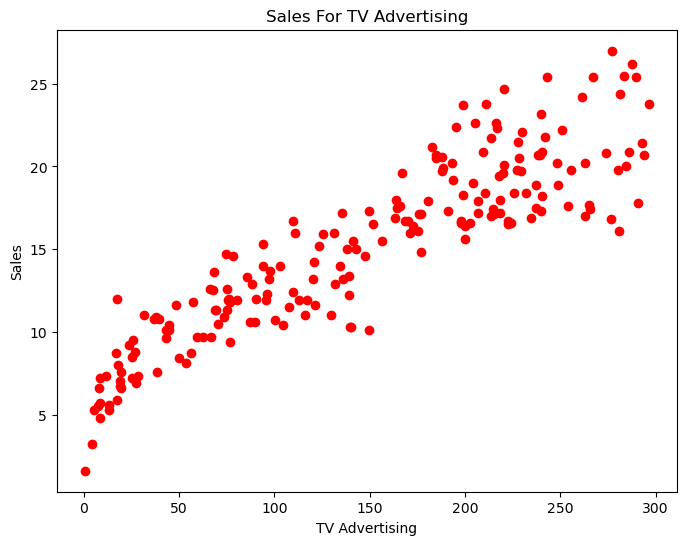

In [110]:
plt.figure(figsize = (8, 6))
plt.scatter(x = df['TV'], y = df['Sales'], color = 'red')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Sales For TV Advertising')
plt.show()

In [111]:
df.corr()

,TV,Radio,Newspaper,Sales,random
TV,1.000000,0.054809,0.056648,0.901208,-0.048154
Radio,0.054809,1.000000,0.354104,0.349631,-0.028146
Newspaper,0.056648,0.354104,1.000000,0.157960,-0.007508
Sales,0.901208,0.349631,0.157960,1.000000,-0.028410
random,-0.048154,-0.028146,-0.007508,-0.028410,1.000000


## 2. Normality

In [112]:
data = df[['TV']]
labels = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size = 0.25)

lr = LinearRegression()

lr.fit(x_train, y_train)

predictions = lr.predict(x_test)
residuals = predictions - y_test

<AxesSubplot:xlabel='Sales', ylabel='Density'>

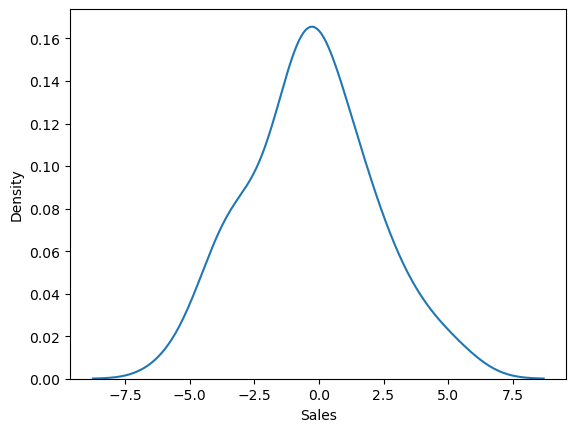

In [114]:
import warnings 
warnings.filterwarnings('ignore')
sns.kdeplot(residuals)     # error haru normally distributed xan

## 3. No multicollinearity

In [116]:
df['twice_radio'] = df['Radio'] * 2

<AxesSubplot:>

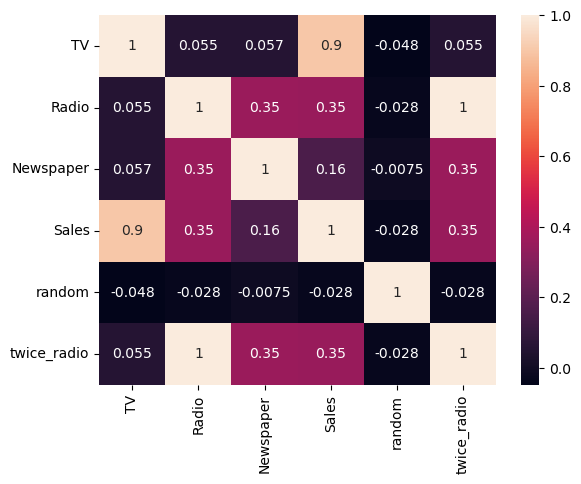

In [117]:
sns.heatmap(df.corr(), annot = True)

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
df = pd.read_csv('advertising.csv')
data = df.drop('Sales', axis = 1)
labels = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size = 0.25)

lr = LinearRegression()

lr.fit(x_train, y_train)

predictions = lr.predict(x_test)
residuals = predictions - y_test

In [122]:
# calculate the variance inflation factor (VIF) for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["Features"] = x_train.columns

# print the VIFs
print(vif)

   VIF Factor   Features
0    2.393727         TV
1    3.307955      Radio
2    2.968221  Newspaper


## 4.Independence:

In [123]:
from statsmodels.stats.stattools import durbin_watson
# use the Durbin-Watson test to test for autocorrelation
dw_statistic = durbin_watson(residuals)
print('Durbin-Watson statistic:', dw_statistic)

Durbin-Watson statistic: 1.5730874544202698


## 5. Homoscedasticity:

In [126]:
df = pd.read_csv('advertising.csv')
data = df.drop('Sales', axis = 1)
labels = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size = 0.25)

lr = LinearRegression()

lr.fit(x_train, y_train)

predictions = lr.predict(x_test)
residuals = predictions - y_test

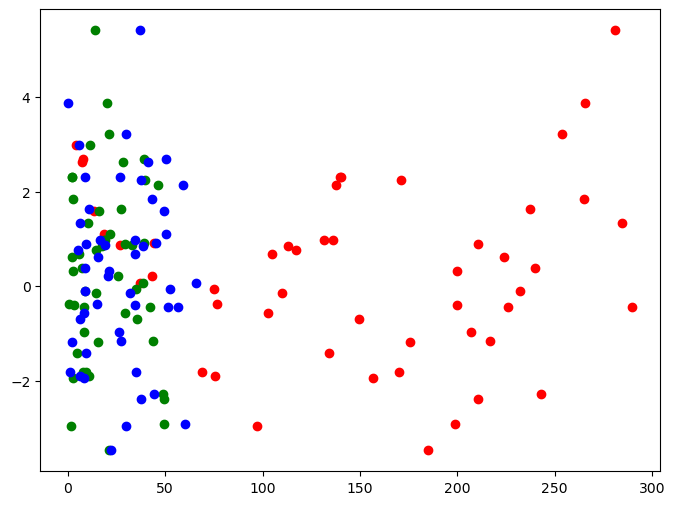

In [127]:
plt.figure(figsize = (8, 6))
# plt.scatter(x_test['TV'], y_test)
plt.scatter(x_test['TV'], residuals, color = 'red')
plt.scatter(x_test['Radio'], residuals, color = 'green')
plt.scatter(x_test['Newspaper'], residuals, color = 'blue')

plt.show()

# Regularization In Regression
During the Machine Learning model building, the Regularization Techniques is an unavoidable and important step to improve the model.<br>
This is also called the Shrinkage method in which we use to add the penalty term to control the complex model to avoid overfitting by reducing the variance.<br>
In regression, we can came across overfitted model where the best fit line works best for the training dataset but fails for testing datasets.<br>
To prevent from such overfitting problem, we have two different methods in regression. They are :<br>

    1. Lasso Regression
    2. Ridge Regression


## 1. Lasso Regression

In [128]:
from sklearn.linear_model import Lasso

In [129]:
df = pd.read_csv('advertising.csv')
data = df.drop('Sales', axis = 1)
labels = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size = 0.2,
                                                   random_state = 42)

In [130]:
lasso = Lasso(alpha = 6)

In [131]:
lasso.fit(x_train, y_train)

Lasso(alpha=6)

In [133]:
lasso.intercept_

5.505669206048642

In [134]:
lasso.coef_

array([0.05391869, 0.07589335, 0.        ])

## 2. Ridge Regession

In [136]:
from sklearn.linear_model import Ridge

In [137]:
df = pd.read_csv('advertising.csv')
data = df.drop('Sales', axis = 1)
labels = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size = 0.2,
                                                   random_state = 42)

In [138]:
ridge = Ridge(alpha = 9)

In [139]:
ridge.fit(x_train, y_train)

Ridge(alpha=9)

In [140]:
ridge.coef_

array([0.05450909, 0.10091511, 0.00434461])